# Python Libraries #

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [18]:
data = pd.read_csv("/content/employee_promotion.csv")


# Exploratory data analysis

Checking categorical type columns in the data

In [19]:
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


###Encoding categorical features

In [20]:
pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['region'])
data['region'] = encpro


In [21]:
data = pd.get_dummies(data, columns=['department', 'gender', 'recruitment_channel'], dtype=int)


Coorelation of feature

# Data Preparation

#### Deleting the duplicate rows

In [22]:
current=len(data)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  54808


In [23]:
data=data.drop_duplicates()

In [24]:
now=len(data)
print('Rows of data after Delecting ', now)

Rows of data after Delecting  54808


#### Dropping unnecessary features

In [25]:
data=data.drop(columns=['employee_id'])

#### Missing value Treatment

#### previous_year_rating null values

In [26]:
data['previous_year_rating'].fillna(value=0,inplace=True)

#### avg_training_score null values

In [27]:
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [28]:
data.isnull().sum()

,0
region,0
education,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
awards_won,0
avg_training_score,0
is_promoted,0
department_Analytics,0


#### Label and features


In [29]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

In [30]:
data.columns

Index(['region', 'education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

# Model building


## Random Forest



### Random Forest with imbalanced data

#### Data Split for Validation

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Random Forest Model

In [32]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

#### Evaluation of model

In [33]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [34]:
from sklearn.metrics import classification_report


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15035
           1       0.84      0.31      0.46      1408

    accuracy                           0.94     16443
   macro avg       0.89      0.65      0.71     16443
weighted avg       0.93      0.94      0.92     16443



### Random Forest with upsampled data

In [36]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

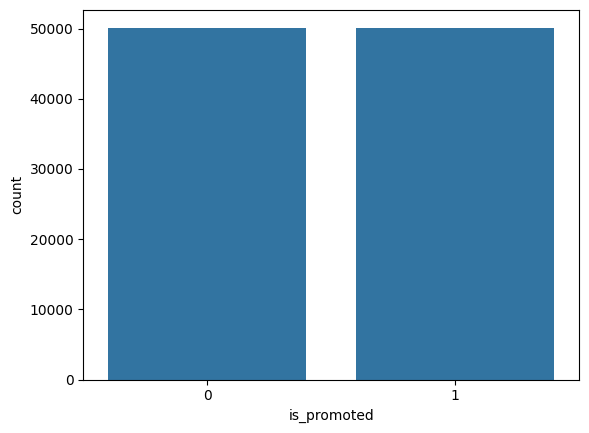

In [37]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Random Forest Model

In [39]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

#### Evaluation of model

In [40]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15105
           1       0.99      0.94      0.96     14979

    accuracy                           0.96     30084
   macro avg       0.97      0.96      0.96     30084
weighted avg       0.97      0.96      0.96     30084



### Random Forest with upsampled data (smote+tomek)

In [42]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

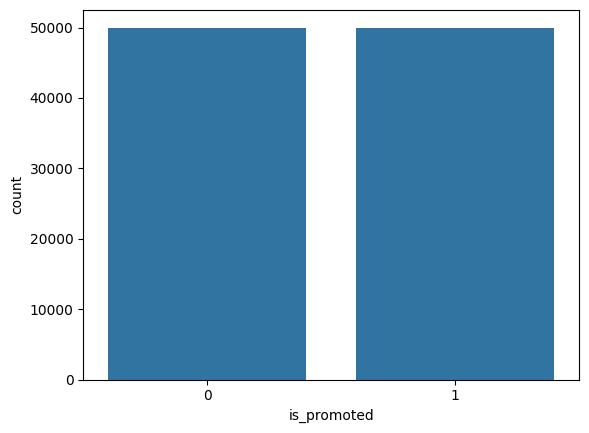

In [43]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Random Forest Model

In [45]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

#### Evaluation of model

In [46]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15003
           1       0.98      0.94      0.96     14995

    accuracy                           0.96     29998
   macro avg       0.96      0.96      0.96     29998
weighted avg       0.96      0.96      0.96     29998



### Random Forest with upsampled data (smote+ENN)

In [48]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

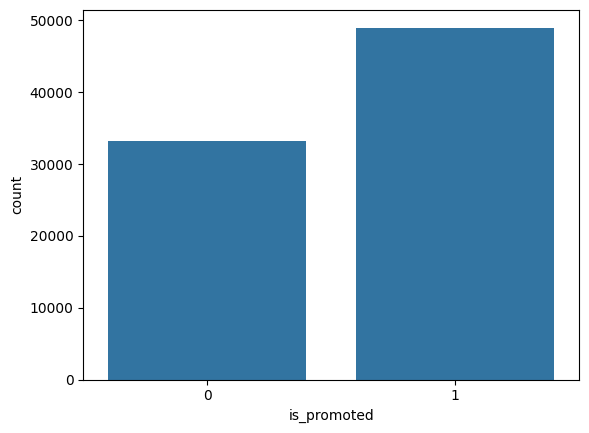

In [49]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Random Forest Model

In [51]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

#### Evaluation of model

In [52]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10048
           1       0.98      0.95      0.97     14619

    accuracy                           0.96     24667
   macro avg       0.96      0.97      0.96     24667
weighted avg       0.96      0.96      0.96     24667



### Random Forest with downsample data

In [54]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [55]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
11,31,0,1,35,5.0,3,0,50.0,1,0,...,0,0,0,1,0,1,0,0,0,1
39,20,0,1,33,5.0,6,0,51.0,1,0,...,0,0,0,1,0,0,1,0,0,1
60,28,2,1,50,4.0,17,0,47.0,1,0,...,0,0,0,1,0,0,1,1,0,0
66,14,0,1,27,0.0,1,1,58.0,1,0,...,0,0,0,0,0,0,1,1,0,0
67,14,0,1,27,0.0,1,0,50.0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49818,11,0,1,37,2.0,12,0,70.0,0,0,...,0,1,0,0,0,1,0,1,0,0
34165,4,2,1,32,3.0,5,0,59.0,0,0,...,0,0,0,0,0,0,1,0,0,1
43814,2,0,1,31,4.0,3,0,60.0,0,0,...,1,0,0,0,0,0,1,1,0,0
15378,11,0,1,45,3.0,16,0,58.0,0,0,...,1,0,0,0,0,1,0,0,0,1


<Axes: xlabel='is_promoted', ylabel='count'>

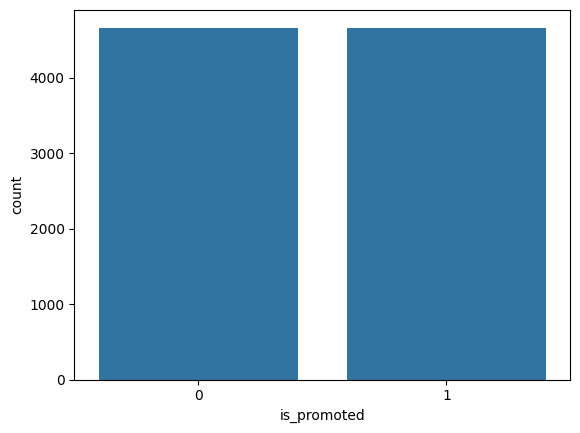

In [56]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Random Forest Model

In [58]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

#### Evaluation of model

In [59]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1373
           1       0.75      0.65      0.70      1428

    accuracy                           0.71      2801
   macro avg       0.72      0.71      0.71      2801
weighted avg       0.72      0.71      0.71      2801




## SVM



### SVM with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### SVM Model

In [ ]:
from sklearn.svm import SVC

SVM = SVC()
SVM = SVM.fit(X_train, y_train)
SVM


SVC()

#### Evaluation of model

In [ ]:
y_pred = SVM.predict(X_test) #getting predictions on the trained model

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     15035
           1       0.00      0.00      0.00      1408

    accuracy                           0.91     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.91      0.87     16443



### SVM with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

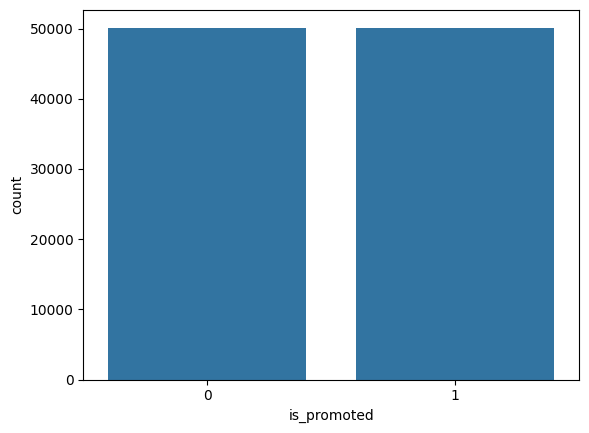

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### SVM Model

In [ ]:
SVM = SVC()
SVM = SVM.fit(X_train, y_train)
SVM


SVC()

#### Evaluation of model

In [ ]:
y_pred = SVM.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69     15105
           1       0.69      0.69      0.69     14979

    accuracy                           0.69     30084
   macro avg       0.69      0.69      0.69     30084
weighted avg       0.69      0.69      0.69     30084



### SVM with upsampled data (smote+tomek)

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

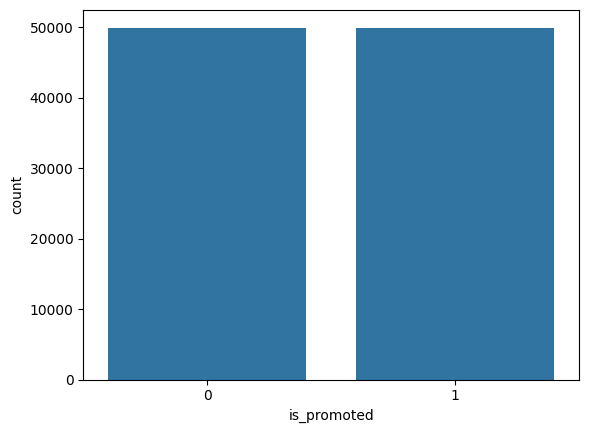

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### SVM Model

In [ ]:
SVM = SVC()
SVM = SVM.fit(X_train, y_train)
SVM


SVC()

#### Evaluation of model

In [ ]:
y_pred = SVM.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69     14969
           1       0.69      0.68      0.69     15007

    accuracy                           0.69     29976
   macro avg       0.69      0.69      0.69     29976
weighted avg       0.69      0.69      0.69     29976



### SVM with upsampled data (smote+ENN)

In [ ]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

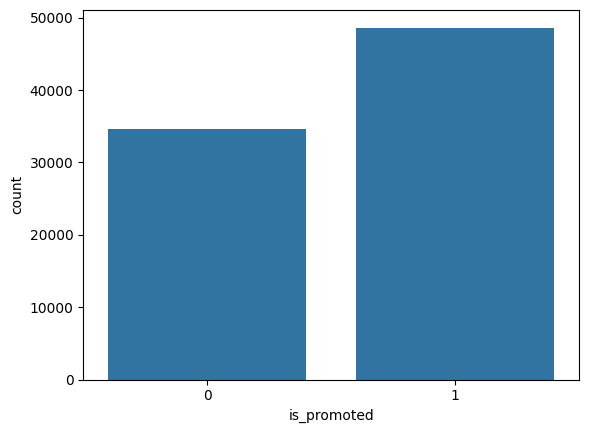

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### SVM Model

In [ ]:
SVM = SVC()
SVM = SVM.fit(X_train, y_train)
SVM


SVC()

#### Evaluation of model

In [ ]:
y_pred = SVM.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62     10472
           1       0.72      0.85      0.78     14514

    accuracy                           0.72     24986
   macro avg       0.72      0.70      0.70     24986
weighted avg       0.72      0.72      0.71     24986



### SVM with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16634,7,4,0,1,0,1,41,5.0,6,0,55.0,0
25544,8,11,2,1,2,1,50,2.0,5,0,84.0,0
17048,4,11,3,1,0,1,43,5.0,11,0,59.0,0
46203,2,11,2,1,2,2,36,3.0,4,0,48.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

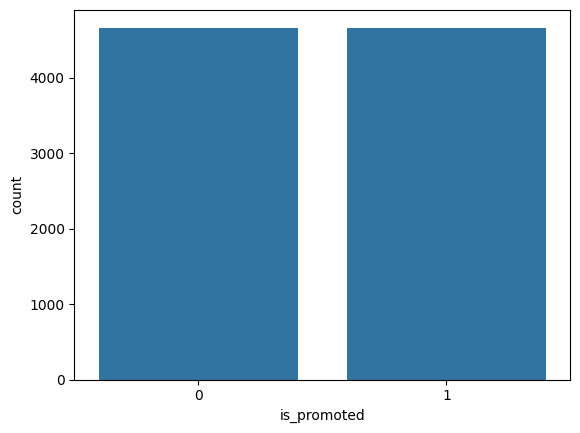

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### SVM Model

In [ ]:
SVM = SVC()
SVM = SVM.fit(X_train, y_train)
SVM


SVC()

#### Evaluation of model

In [ ]:
y_pred = SVM.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.65      1373
           1       0.67      0.57      0.61      1428

    accuracy                           0.63      2801
   macro avg       0.64      0.64      0.63      2801
weighted avg       0.64      0.63      0.63      2801




## Decision Tree



### Decision Tree with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT


DecisionTreeClassifier()

#### Evaluation of model

In [ ]:
y_pred = DT.predict(X_test) #getting predictions on the trained model

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15035
           1       0.33      0.40      0.36      1408

    accuracy                           0.88     16443
   macro avg       0.64      0.66      0.65     16443
weighted avg       0.89      0.88      0.88     16443



### Decision Tree with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

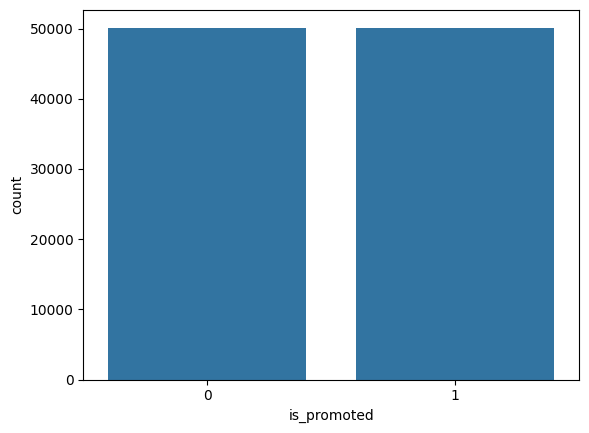

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Decision Tree Model

In [ ]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT

DecisionTreeClassifier()

#### Evaluation of model

In [ ]:
y_pred = DT.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     15105
           1       0.90      0.93      0.92     14979

    accuracy                           0.91     30084
   macro avg       0.91      0.91      0.91     30084
weighted avg       0.91      0.91      0.91     30084



### Decision Tree with upsampled data (smote+tomek)

In [ ]:

smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

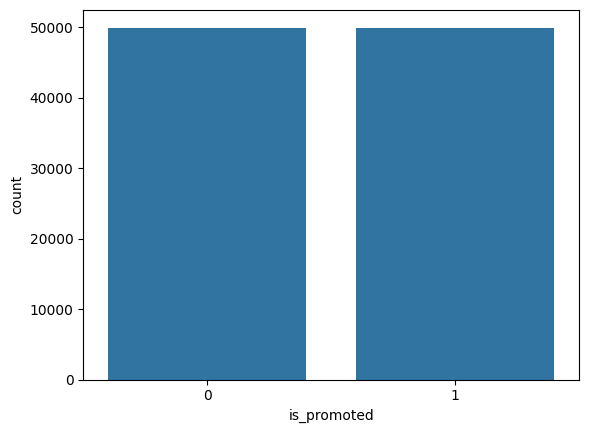

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Decision Tree Model

In [ ]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT

DecisionTreeClassifier()

#### Evaluation of model

In [ ]:
y_pred = DT.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     14887
           1       0.91      0.93      0.92     15086

    accuracy                           0.92     29973
   macro avg       0.92      0.92      0.92     29973
weighted avg       0.92      0.92      0.92     29973



### Decision Tree with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

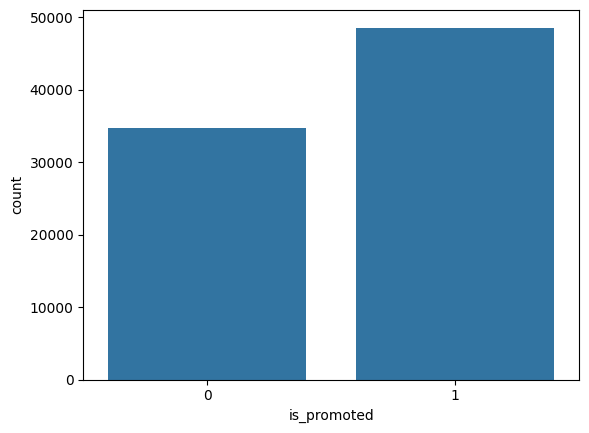

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Decision Tree Model

In [ ]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT

DecisionTreeClassifier()

#### Evaluation of model

In [ ]:
y_pred = DT.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10516
           1       0.93      0.95      0.94     14502

    accuracy                           0.93     25018
   macro avg       0.93      0.92      0.93     25018
weighted avg       0.93      0.93      0.93     25018



### Decision Tree with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
553,7,11,0,0,0,1,29,0.0,1,0,50.0,0
26570,1,19,0,1,2,1,27,3.0,4,0,50.0,0
35234,7,11,0,1,0,1,30,5.0,4,0,48.0,0
16559,0,31,0,1,0,1,38,5.0,4,0,88.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

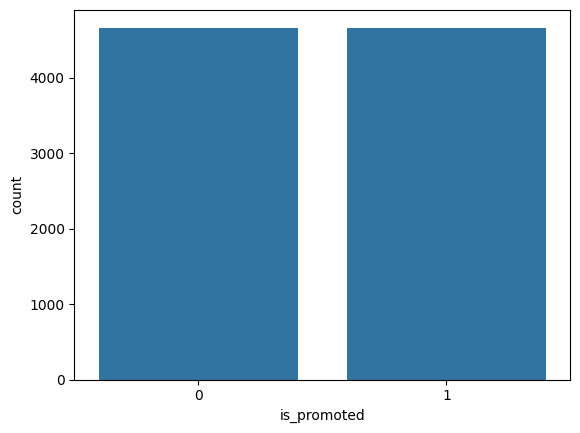

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Decision Tree Model

In [ ]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT


DecisionTreeClassifier()

#### Evaluation of model

In [ ]:
y_pred = DT.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1373
           1       0.65      0.65      0.65      1428

    accuracy                           0.64      2801
   macro avg       0.64      0.64      0.64      2801
weighted avg       0.64      0.64      0.64      2801




## Naïve Bayes




### Naïve Bayes with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Naïve Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB

GaussianNB()

#### Evaluation of model

In [ ]:
y_pred = NB.predict(X_test) #getting predictions on the trained model

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15035
           1       0.48      0.13      0.20      1408

    accuracy                           0.91     16443
   macro avg       0.70      0.56      0.58     16443
weighted avg       0.89      0.91      0.89     16443



### Naïve Bayes with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

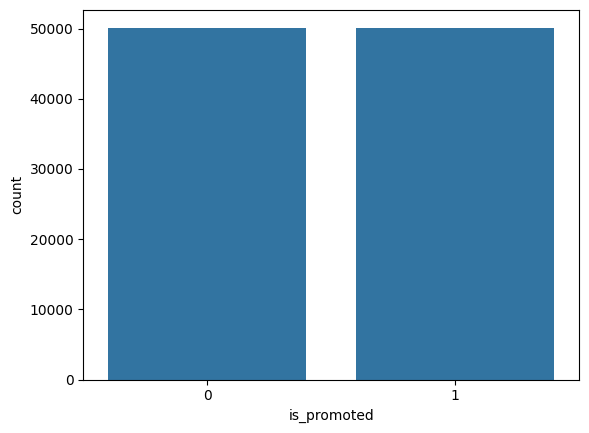

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Naïve Bayes Model

In [ ]:
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB

GaussianNB()

#### Evaluation of model

In [ ]:
y_pred = NB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65     15105
           1       0.65      0.74      0.69     14979

    accuracy                           0.67     30084
   macro avg       0.68      0.67      0.67     30084
weighted avg       0.68      0.67      0.67     30084



### Naïve Bayes with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9220,7,14,0,0,0,1,26,5.0,2,0,51.0,0
41108,4,1,2,1,2,1,31,5.0,5,0,55.0,0
54580,8,31,2,0,0,1,57,3.0,31,0,77.0,0
6568,7,14,0,1,0,1,30,4.0,6,0,50.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

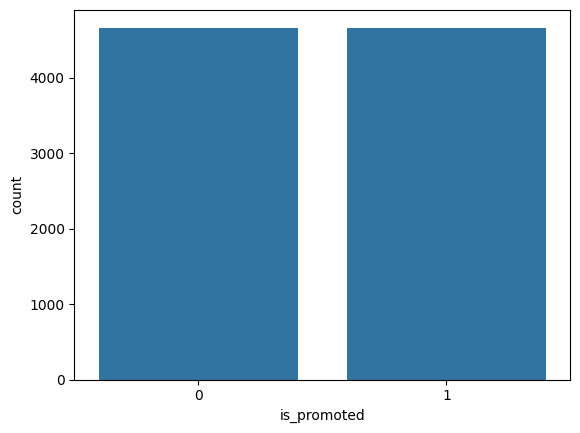

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Naïve Bayes Model

In [ ]:
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB

GaussianNB()

#### Evaluation of model

In [ ]:
y_pred = NB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70      1373
           1       0.78      0.34      0.47      1428

    accuracy                           0.61      2801
   macro avg       0.67      0.62      0.58      2801
weighted avg       0.68      0.61      0.58      2801



### Naïve Bayes with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

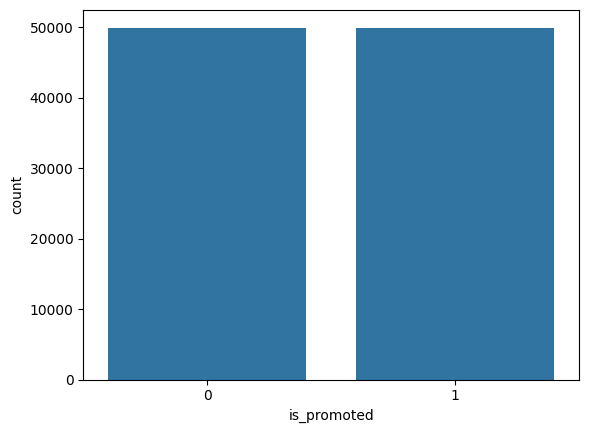

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Naïve Bayes Model

In [ ]:
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB

GaussianNB()

#### Evaluation of model

In [ ]:
y_pred = NB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65     15006
           1       0.65      0.73      0.69     14966

    accuracy                           0.67     29972
   macro avg       0.68      0.67      0.67     29972
weighted avg       0.68      0.67      0.67     29972



### Naïve Bayes with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

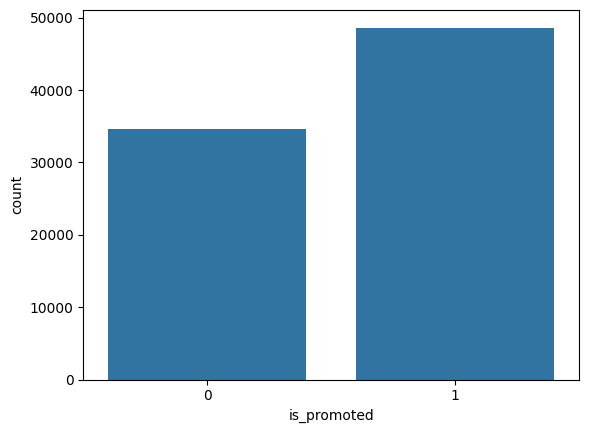

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Naïve Bayes Model

In [ ]:
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB

GaussianNB()

#### Evaluation of model

In [ ]:
y_pred = NB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61     10443
           1       0.72      0.80      0.76     14543

    accuracy                           0.70     24986
   macro avg       0.69      0.68      0.68     24986
weighted avg       0.70      0.70      0.70     24986




## K-Nearest Neighbors (KNN)



### KNN with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
KNN


KNeighborsClassifier()

#### Evaluation of model

In [ ]:
y_pred = KNN.predict(X_test) #getting predictions on the trained model

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15035
           1       0.73      0.15      0.25      1408

    accuracy                           0.92     16443
   macro avg       0.83      0.57      0.60     16443
weighted avg       0.91      0.92      0.90     16443



### KNN with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

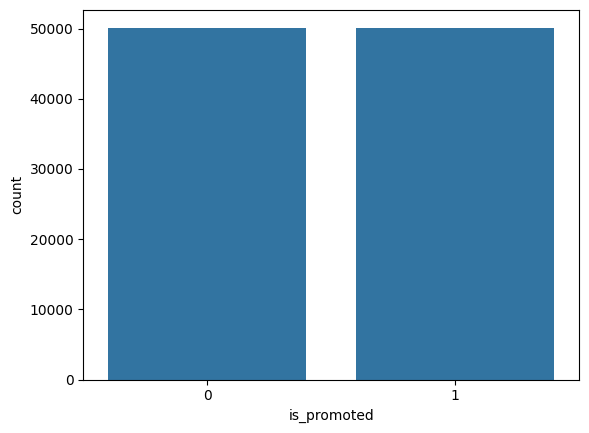

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
KNN


KNeighborsClassifier()

#### Evaluation of model

In [ ]:
y_pred = KNN.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     15105
           1       0.79      0.99      0.88     14979

    accuracy                           0.87     30084
   macro avg       0.89      0.87      0.86     30084
weighted avg       0.89      0.87      0.86     30084



### KNN with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50512,4,18,0,0,2,1,31,3.0,4,0,55.0,0
7937,7,11,0,0,2,1,46,3.0,12,0,49.0,0
40526,1,1,2,1,2,1,35,3.0,8,0,60.0,0
47282,7,14,0,0,2,1,35,3.0,7,0,49.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

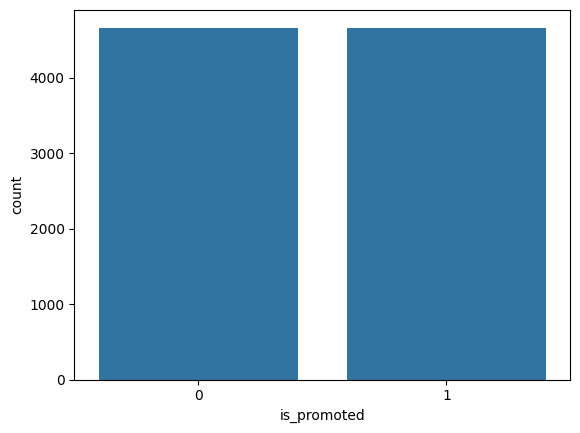

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
KNN


KNeighborsClassifier()

#### Evaluation of model

In [ ]:
y_pred = KNN.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1373
           1       0.65      0.60      0.62      1428

    accuracy                           0.63      2801
   macro avg       0.63      0.63      0.63      2801
weighted avg       0.63      0.63      0.63      2801



### KNN with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

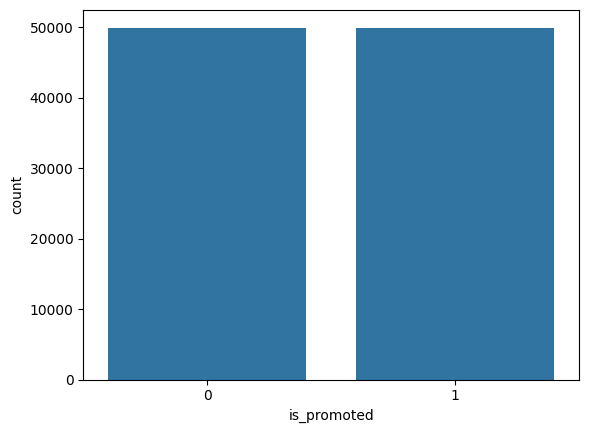

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
KNN


KNeighborsClassifier()

#### Evaluation of model

In [ ]:
y_pred = KNN.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     15065
           1       0.79      0.99      0.88     14903

    accuracy                           0.87     29968
   macro avg       0.89      0.87      0.86     29968
weighted avg       0.89      0.87      0.86     29968



### KNN with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

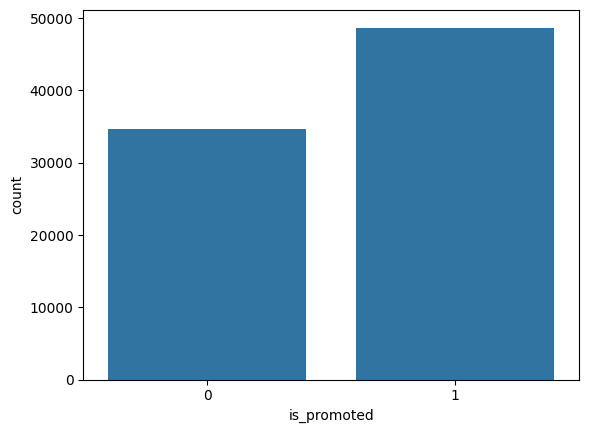

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
KNN


KNeighborsClassifier()

#### Evaluation of model

In [ ]:
y_pred = KNN.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10471
           1       0.91      1.00      0.95     14552

    accuracy                           0.94     25023
   macro avg       0.95      0.93      0.94     25023
weighted avg       0.94      0.94      0.94     25023




## XGBoost



### XGBoost with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### XGB Model

In [ ]:
import xgboost as xgb

XGB = xgb.XGBClassifier()
XGB = XGB.fit(X_train, y_train)
XGB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluation of model

In [ ]:
y_pred = XGB.predict(X_test) #getting predictions on the trained model

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15035
           1       0.88      0.34      0.49      1408

    accuracy                           0.94     16443
   macro avg       0.91      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



### XGBoost with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

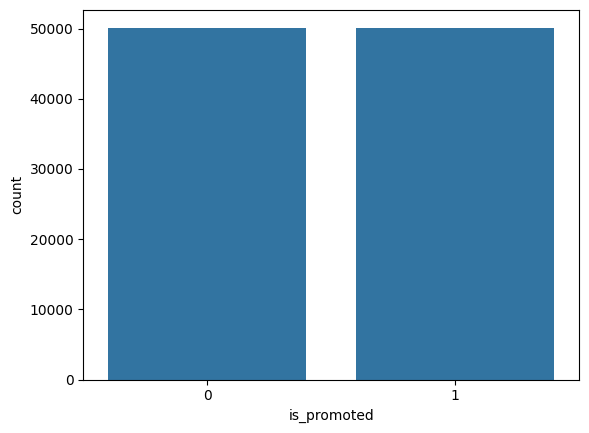

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### XGB Model

In [ ]:
XGB = xgb.XGBClassifier()
XGB = XGB.fit(X_train, y_train)
XGB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluation of model

In [ ]:
y_pred = XGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     15105
           1       0.97      0.89      0.92     14979

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084



### XGBoost with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

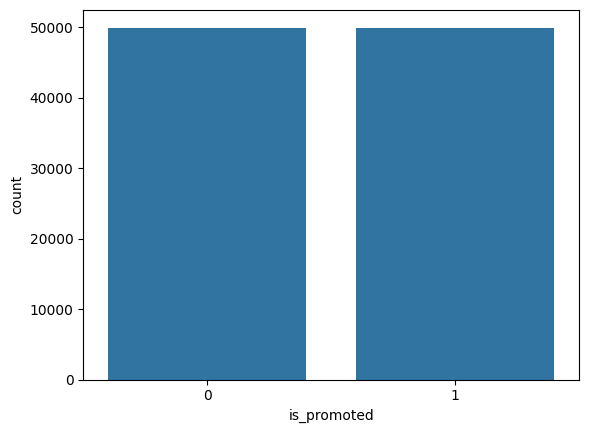

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### XGB Model

In [ ]:
XGB = xgb.XGBClassifier()
XGB = XGB.fit(X_train, y_train)
XGB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluation of model

In [ ]:
y_pred = XGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     15019
           1       0.97      0.88      0.92     14951

    accuracy                           0.92     29970
   macro avg       0.93      0.92      0.92     29970
weighted avg       0.93      0.92      0.92     29970



### XGBoost with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

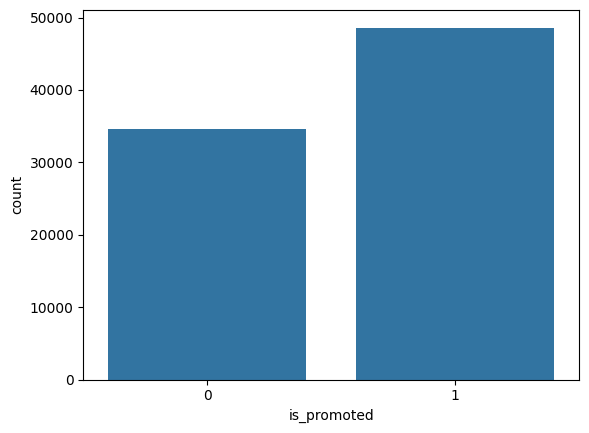

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### XGB Model

In [ ]:
XGB = xgb.XGBClassifier()
XGB = XGB.fit(X_train, y_train)
XGB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluation of model

In [ ]:
y_pred = XGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10424
           1       0.96      0.92      0.94     14549

    accuracy                           0.93     24973
   macro avg       0.93      0.93      0.93     24973
weighted avg       0.93      0.93      0.93     24973



### XGBoost with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15302,7,12,2,1,2,1,43,5.0,6,0,51.0,0
2205,4,4,0,1,0,1,31,5.0,5,0,59.0,0
39200,7,11,0,0,0,1,32,4.0,7,0,48.0,0
24786,5,24,0,0,2,2,33,3.0,5,0,68.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

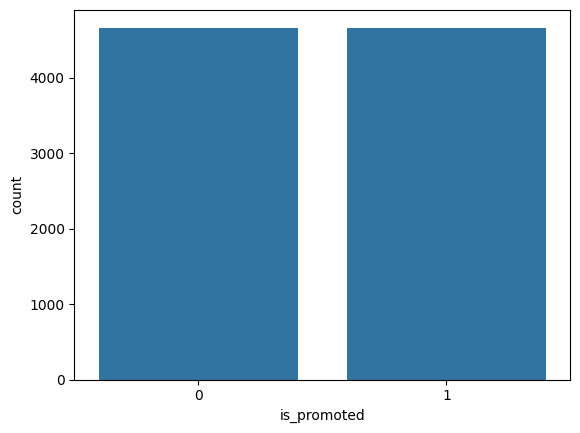

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### XGB Model

In [ ]:
XGB = xgb.XGBClassifier()
XGB = XGB.fit(X_train, y_train)
XGB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluation of model

In [ ]:
y_pred = XGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1373
           1       0.73      0.66      0.69      1428

    accuracy                           0.70      2801
   macro avg       0.71      0.70      0.70      2801
weighted avg       0.71      0.70      0.70      2801




## Extra Trees Classifier



### Extra Trees Classifier with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Extra Trees Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)
ETC


ExtraTreesClassifier()

#### Evaluation of model

In [ ]:
y_pred = ETC.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15035
           1       0.68      0.26      0.38      1408

    accuracy                           0.93     16443
   macro avg       0.81      0.63      0.67     16443
weighted avg       0.91      0.93      0.91     16443



### Extra Trees Classifier with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

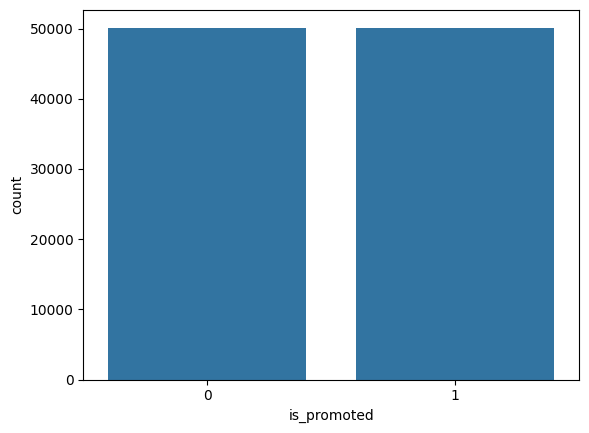

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Extra Trees Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)
ETC


ExtraTreesClassifier()

#### Evaluation of model

In [ ]:
y_pred = ETC.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15105
           1       0.95      0.95      0.95     14979

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084



### Extra Trees Classifier with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

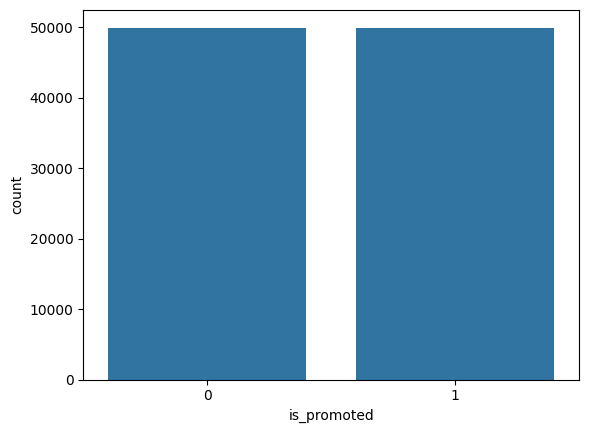

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Extra Trees Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)
ETC


ExtraTreesClassifier()

#### Evaluation of model

In [ ]:
y_pred = ETC.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15040
           1       0.96      0.95      0.95     14941

    accuracy                           0.95     29981
   macro avg       0.95      0.95      0.95     29981
weighted avg       0.95      0.95      0.95     29981



### Extra Trees Classifier with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

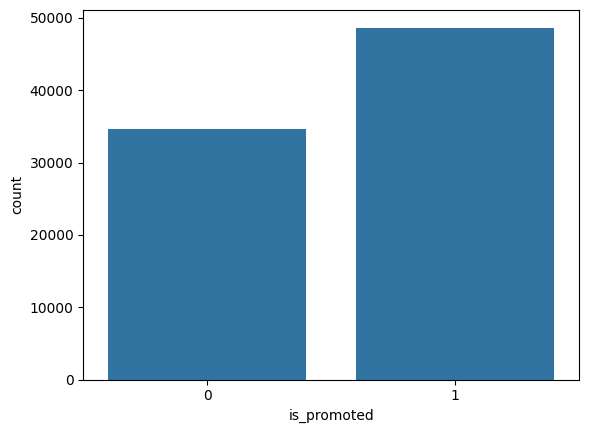

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Extra Trees Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)
ETC


ExtraTreesClassifier()

#### Evaluation of model

In [ ]:
y_pred = ETC.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10461
           1       0.97      0.96      0.97     14541

    accuracy                           0.96     25002
   macro avg       0.96      0.96      0.96     25002
weighted avg       0.96      0.96      0.96     25002



### Extra Trees Classifier with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12404,7,30,0,1,0,1,39,3.0,14,0,52.0,0
53563,5,7,0,0,0,1,25,1.0,4,0,65.0,0
52284,7,6,0,1,0,1,38,4.0,12,0,52.0,0
28908,1,18,0,1,0,1,28,3.0,4,0,55.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

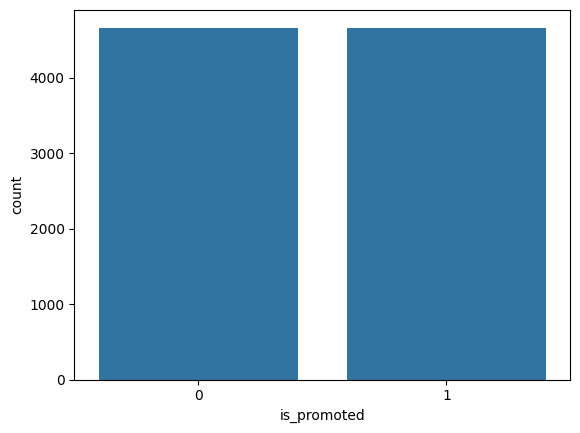

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Extra Trees Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)
ETC


ExtraTreesClassifier()

#### Evaluation of model

In [ ]:
y_pred = ETC.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1373
           1       0.72      0.66      0.69      1428

    accuracy                           0.69      2801
   macro avg       0.70      0.70      0.69      2801
weighted avg       0.70      0.69      0.69      2801




## LightGBM



### LightGBM with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### LightGBM Model

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB = LGB.fit(X_train, y_train)
LGB


[LightGBM] [Info] Number of positive: 3260, number of negative: 35105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 38365, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084973 -> initscore=-2.376616
[LightGBM] [Info] Start training from score -2.376616


LGBMClassifier()

#### Evaluation of model

In [ ]:
y_pred = LGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15035
           1       0.93      0.33      0.49      1408

    accuracy                           0.94     16443
   macro avg       0.94      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



### LightGBM with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

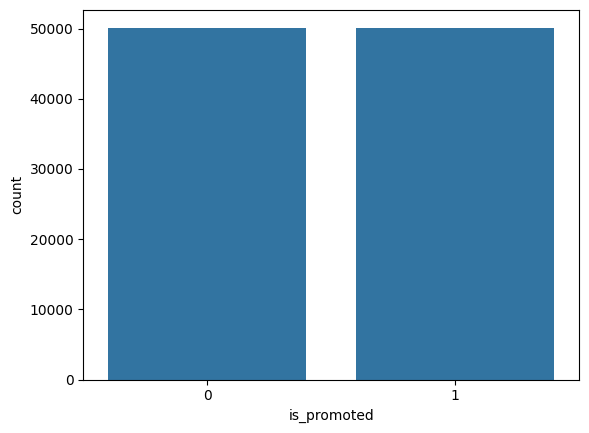

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### LightGBM Model

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB = LGB.fit(X_train, y_train)
LGB


[LightGBM] [Info] Number of positive: 35161, number of negative: 35035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 70196, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500897 -> initscore=0.003590
[LightGBM] [Info] Start training from score 0.003590


LGBMClassifier()

#### Evaluation of model

In [ ]:
y_pred = LGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15105
           1       0.97      0.89      0.92     14979

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084



### LightGBM with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

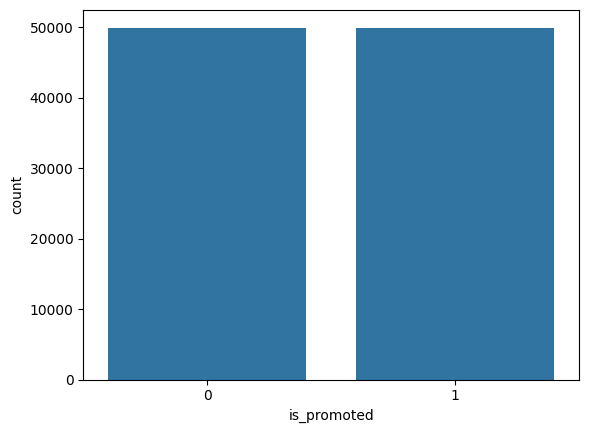

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### LightGBM Model

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB = LGB.fit(X_train, y_train)
LGB


[LightGBM] [Info] Number of positive: 35010, number of negative: 34893
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 69903, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500837 -> initscore=0.003347
[LightGBM] [Info] Start training from score 0.003347


LGBMClassifier()

#### Evaluation of model

In [ ]:
y_pred = LGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15038
           1       0.96      0.89      0.92     14921

    accuracy                           0.93     29959
   macro avg       0.93      0.93      0.93     29959
weighted avg       0.93      0.93      0.93     29959



### LightGBM with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

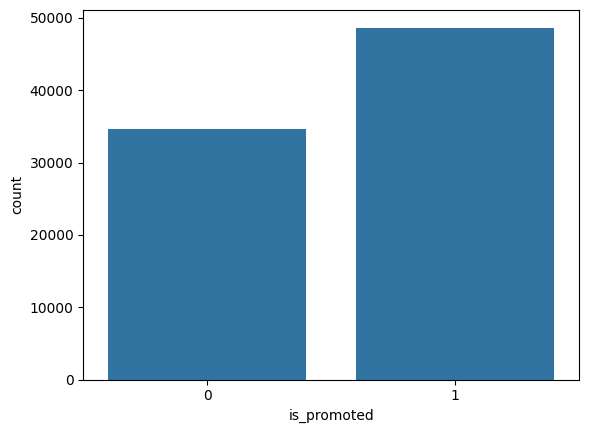

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### LightGBM Model

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB = LGB.fit(X_train, y_train)
LGB


[LightGBM] [Info] Number of positive: 34108, number of negative: 24175
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 58283, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585214 -> initscore=0.344213
[LightGBM] [Info] Start training from score 0.344213


LGBMClassifier()

#### Evaluation of model

In [ ]:
y_pred = LGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10431
           1       0.96      0.91      0.93     14548

    accuracy                           0.92     24979
   macro avg       0.92      0.93      0.92     24979
weighted avg       0.93      0.92      0.93     24979



### LightGBM with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47552,7,11,0,1,2,2,29,1.0,5,0,50.0,0
7743,4,2,0,0,2,1,42,3.0,3,0,58.0,0
50043,7,11,2,0,2,1,31,4.0,6,0,48.0,0
9001,0,31,0,1,2,1,37,3.0,10,0,87.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

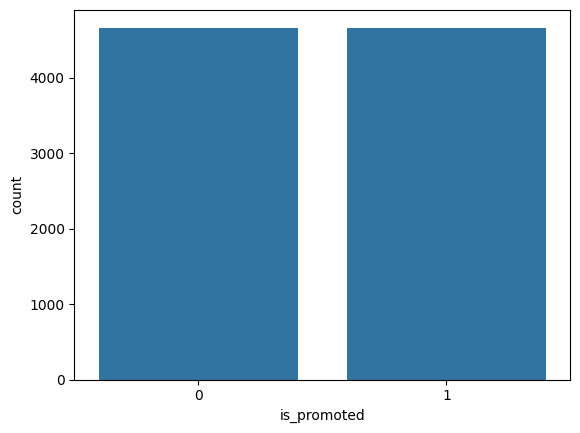

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### LightGBM Model

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB = LGB.fit(X_train, y_train)
LGB


[LightGBM] [Info] Number of positive: 3240, number of negative: 3295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495792 -> initscore=-0.016833
[LightGBM] [Info] Start training from score -0.016833


LGBMClassifier()

#### Evaluation of model

In [ ]:
y_pred = LGB.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      1373
           1       0.77      0.64      0.70      1428

    accuracy                           0.72      2801
   macro avg       0.73      0.72      0.72      2801
weighted avg       0.73      0.72      0.72      2801




## Logistic Regression



### Logistic Regression with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Logistic Regression Model

In [ ]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR


LogisticRegression()

#### Evaluation of model

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15035
           1       0.59      0.08      0.14      1408

    accuracy                           0.92     16443
   macro avg       0.76      0.54      0.55     16443
weighted avg       0.89      0.92      0.89     16443



### Logistic Regression with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

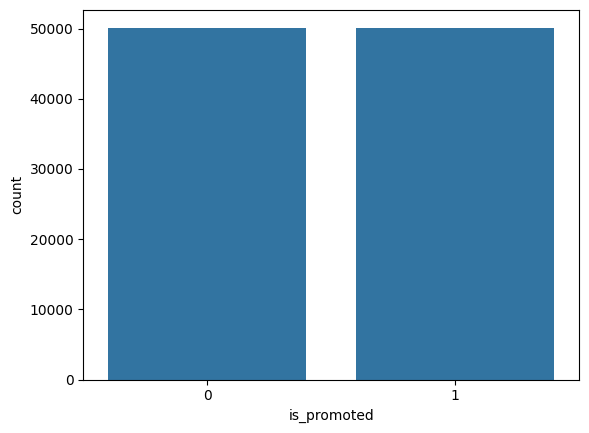

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Logistic Regression Model

In [ ]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR


LogisticRegression()

#### Evaluation of model

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     15105
           1       0.68      0.71      0.69     14979

    accuracy                           0.69     30084
   macro avg       0.69      0.69      0.69     30084
weighted avg       0.69      0.69      0.69     30084



### Logistic Regression with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

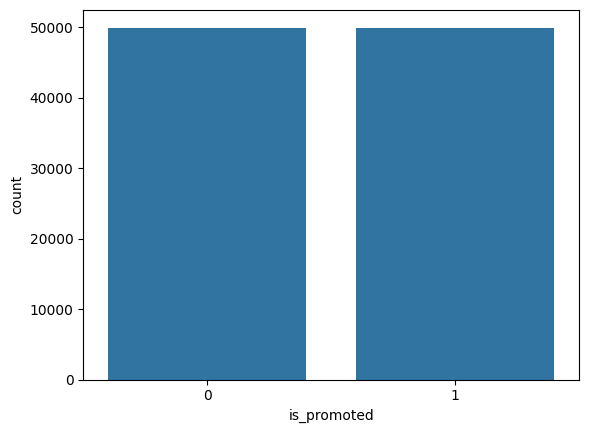

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Logistic Regression Model

In [ ]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR


LogisticRegression()

#### Evaluation of model

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     15032
           1       0.68      0.70      0.69     14938

    accuracy                           0.68     29970
   macro avg       0.68      0.68      0.68     29970
weighted avg       0.68      0.68      0.68     29970



### Logistic Regression with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

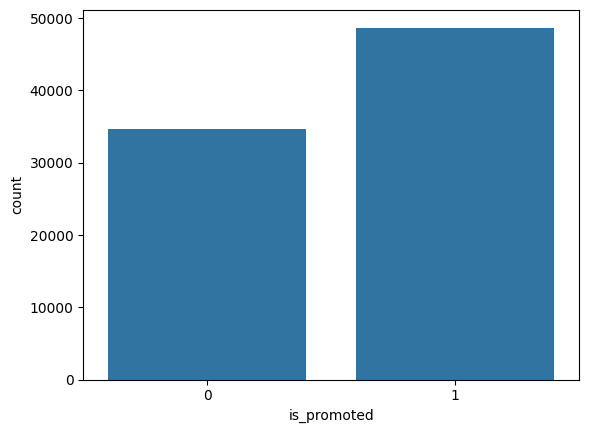

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Logistic Regression Model

In [ ]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR


LogisticRegression()

#### Evaluation of model

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62     10464
           1       0.72      0.82      0.77     14539

    accuracy                           0.71     25003
   macro avg       0.71      0.69      0.70     25003
weighted avg       0.71      0.71      0.71     25003



### Logistic Regression with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40476,4,14,0,1,0,1,32,2.0,7,0,53.0,0
40085,3,11,0,1,2,1,49,4.0,15,0,63.0,0
50747,4,12,2,0,2,1,36,5.0,7,0,62.0,0
28476,7,31,3,1,2,1,25,1.0,3,0,48.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

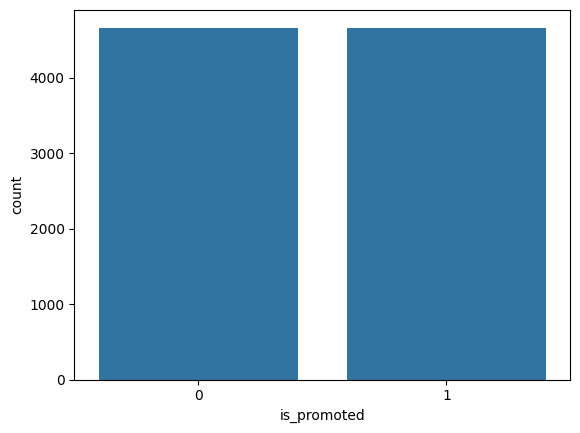

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Logistic Regression Model

In [ ]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
LR


LogisticRegression()

#### Evaluation of model

In [ ]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1373
           1       0.69      0.63      0.66      1428

    accuracy                           0.67      2801
   macro avg       0.67      0.67      0.67      2801
weighted avg       0.67      0.67      0.67      2801




## Adaboost



### ADA with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Stump

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_clf = DecisionTreeClassifier(max_depth=1)  # Stump

#### ADA Model

In [ ]:
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=2)
ada = ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=2)

#### Evaluation of model

In [ ]:
y_pred = ada.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15035
           1       0.80      0.15      0.26      1408

    accuracy                           0.92     16443
   macro avg       0.86      0.58      0.61     16443
weighted avg       0.92      0.92      0.90     16443



### ada with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

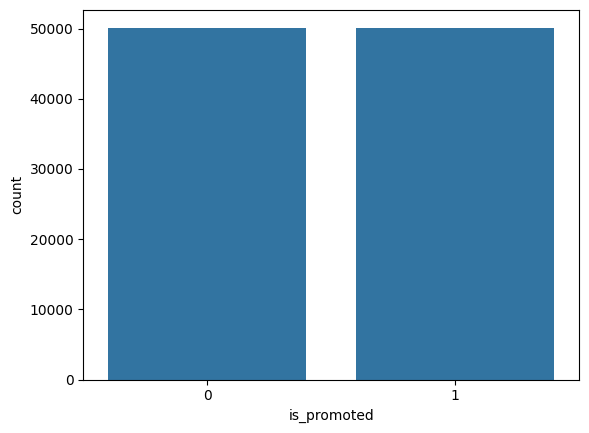

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ADA Model

In [ ]:
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=2)
ada = ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=2)

#### Evaluation of model

In [ ]:
y_pred = ada.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     15105
           1       0.84      0.80      0.82     14979

    accuracy                           0.82     30084
   macro avg       0.83      0.82      0.82     30084
weighted avg       0.83      0.82      0.82     30084



### ADA with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38724,4,11,0,0,2,1,31,3.0,7,0,62.0,0
9261,0,14,2,1,0,1,44,5.0,4,0,86.0,0
32905,5,28,2,1,0,1,44,3.0,15,0,70.0,0
34311,7,1,2,1,2,1,36,4.0,4,0,54.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

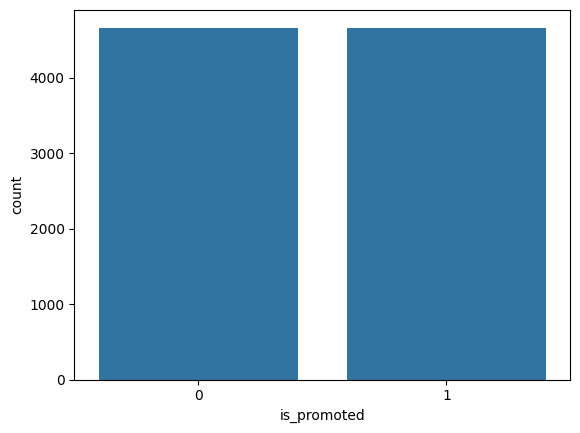

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### ADA Model

In [ ]:
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=2)
ada = ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=2)

#### Evaluation of model

In [ ]:
y_pred = ada.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1373
           1       0.72      0.64      0.68      1428

    accuracy                           0.69      2801
   macro avg       0.69      0.69      0.69      2801
weighted avg       0.69      0.69      0.69      2801



### ada with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

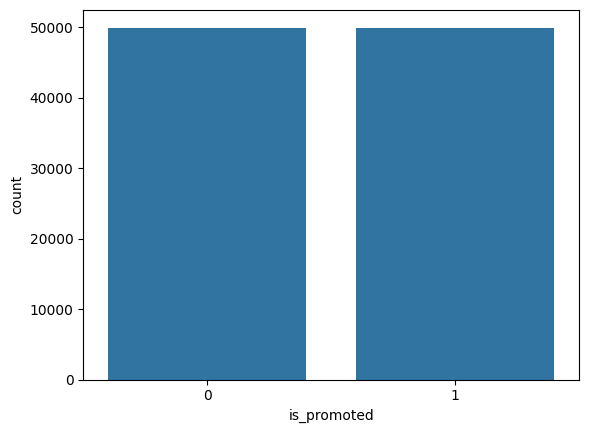

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ADA Model

In [ ]:
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=2)
ada = ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=2)

#### Evaluation of model

In [ ]:
y_pred = ada.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     15056
           1       0.85      0.78      0.81     14932

    accuracy                           0.82     29988
   macro avg       0.82      0.82      0.82     29988
weighted avg       0.82      0.82      0.82     29988



### ada with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

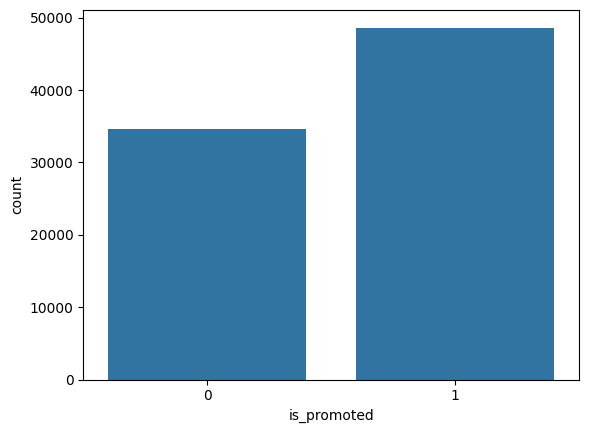

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ADA Model

In [ ]:
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=2)
ada = ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=2)

#### Evaluation of model

In [ ]:
y_pred = ada.predict(X_test) #getting predictions on the trained model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     10487
           1       0.85      0.84      0.85     14500

    accuracy                           0.82     24987
   macro avg       0.82      0.82      0.82     24987
weighted avg       0.82      0.82      0.82     24987




## Artificial Neural Network (ANN) with Keras Sequential API



In [ ]:
!pip install tensorflow

### ANN with imbalanced data

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8987 - loss: 0.4252 - val_accuracy: 0.9152 - val_loss: 0.2840
Epoch 2/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9170 - loss: 0.2812 - val_accuracy: 0.9150 - val_loss: 0.2770
Epoch 3/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9172 - loss: 0.2771 - val_accuracy: 0.9165 - val_loss: 0.2682
Epoch 4/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9156 - loss: 0.2770 - val_accuracy: 0.9172 - val_loss: 0.2658
Epoch 5/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2653 - val_accuracy: 0.9181 - val_loss: 0.2620
Epoch 6/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9199 - loss: 0.2631 - val_accuracy: 0.9172 - val_loss: 0.2672
Epoch 7/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9190 - loss: 0.2642 - val_accuracy: 0.9184 - val_loss: 0.2596
Epoch 8/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9190 - loss: 0.2645 

#### Evaluation of model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and get classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2226
Test Loss: 0.2254561185836792
Test Accuracy: 0.9325549006462097
514/514 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15035
           1       0.92      0.23      0.37      1408

    accuracy                           0.93     16443
   macro avg       0.93      0.61      0.67     16443
weighted avg       0.93      0.93      0.91     16443



### ANN with upsampled data

In [ ]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

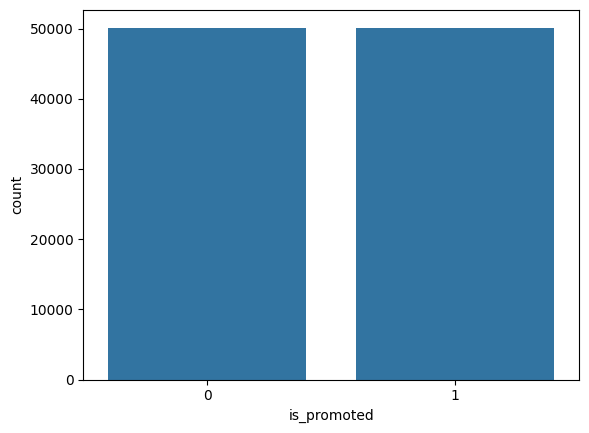

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6411 - loss: 0.6536 - val_accuracy: 0.6825 - val_loss: 0.5915
Epoch 2/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6764 - loss: 0.5887 - val_accuracy: 0.6939 - val_loss: 0.5670
Epoch 3/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6844 - loss: 0.5759 - val_accuracy: 0.6957 - val_loss: 0.5576
Epoch 4/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6937 - loss: 0.5585 - val_accuracy: 0.7002 - val_loss: 0.5449
Epoch 5/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7003 - loss: 0.5475 - val_accuracy: 0.7070 - val_loss: 0.5325
Epoch 6/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7068 - loss: 0.5379 - val_accuracy: 0.7171 - val_loss: 0.5188
Epoch 7/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7156 - loss: 0.5231 - val_accuracy: 0.7115 - val_loss: 0.5479
Epoch 8/50
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7274 - loss: 0.5

#### Evaluation of model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and get classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


941/941 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8006 - loss: 0.4031
Test Loss: 0.4012318551540375
Test Accuracy: 0.7995280027389526
941/941 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     15105
           1       0.80      0.80      0.80     14979

    accuracy                           0.80     30084
   macro avg       0.80      0.80      0.80     30084
weighted avg       0.80      0.80      0.80     30084



### ANN with upsampled data (smote+tomek)

In [ ]:
smt = SMOTETomek()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

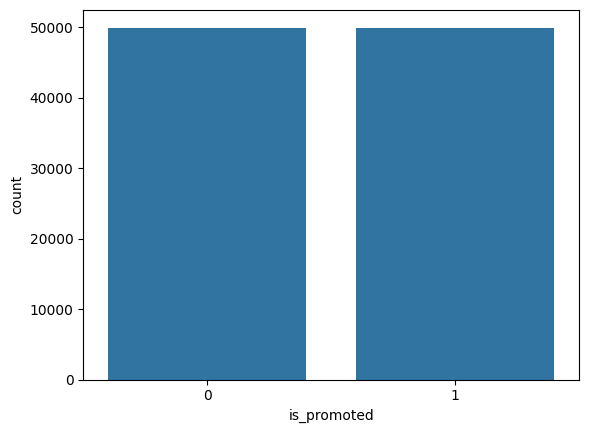

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6419 - loss: 0.6512 - val_accuracy: 0.6600 - val_loss: 0.6047
Epoch 2/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6769 - loss: 0.5879 - val_accuracy: 0.6703 - val_loss: 0.5979
Epoch 3/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6801 - loss: 0.5800 - val_accuracy: 0.6869 - val_loss: 0.5706
Epoch 4/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6895 - loss: 0.5688 - val_accuracy: 0.6913 - val_loss: 0.5593
Epoch 5/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6937 - loss: 0.5575 - val_accuracy: 0.6998 - val_loss: 0.5504
Epoch 6/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7071 - loss: 0.5361 - val_accuracy: 0.7188 - val_loss: 0.5265
Epoch 7/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7140 - loss: 0.5247 - val_accuracy: 0.7239 - val_loss: 0.5144
Epoch 8/50
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7218 - loss: 0.5137

#### Evaluation of model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and get classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7922 - loss: 0.4087
Test Loss: 0.4060231149196625
Test Accuracy: 0.7966650128364563
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     15039
           1       0.81      0.77      0.79     14946

    accuracy                           0.80     29985
   macro avg       0.80      0.80      0.80     29985
weighted avg       0.80      0.80      0.80     29985



### ANN with upsampled data (smote+ENN)

In [ ]:
smt = SMOTEENN()
X_up, y_up = smt.fit_resample(X, y)

<Axes: xlabel='is_promoted', ylabel='count'>

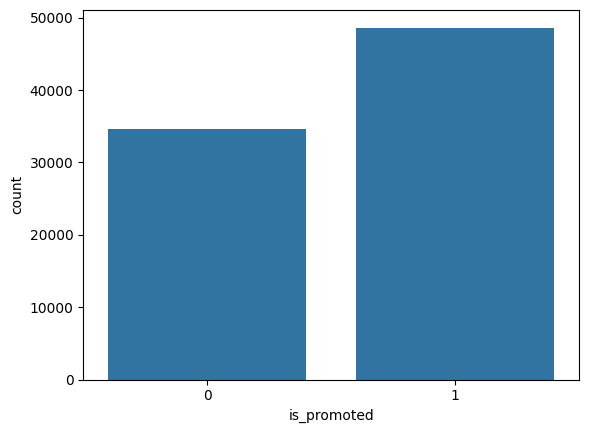

In [ ]:
sns.countplot(data= data, x = y_up)

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6602 - loss: 0.6419 - val_accuracy: 0.7165 - val_loss: 0.5458
Epoch 2/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7166 - loss: 0.5430 - val_accuracy: 0.7273 - val_loss: 0.5287
Epoch 3/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7216 - loss: 0.5344 - val_accuracy: 0.7311 - val_loss: 0.5204
Epoch 4/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7363 - loss: 0.5164 - val_accuracy: 0.7353 - val_loss: 0.5141
Epoch 5/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7380 - loss: 0.5103 - val_accuracy: 0.7415 - val_loss: 0.5011
Epoch 6/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7450 - loss: 0.4992 - val_accuracy: 0.7490 - val_loss: 0.4869
Epoch 7/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7477 - loss: 0.4901 - val_accuracy: 0.7496 - val_loss: 0.4877
Epoch 8/50
1823/1823 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7564 - loss: 0.4761 - 

#### Evaluation of model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and get classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8364 - loss: 0.3571
Test Loss: 0.35866832733154297
Test Accuracy: 0.8345804214477539
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     10490
           1       0.84      0.88      0.86     14501

    accuracy                           0.83     24991
   macro avg       0.83      0.83      0.83     24991
weighted avg       0.83      0.83      0.83     24991



### ANN with downsample data

In [ ]:
data["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41665,7,15,2,1,0,1,33,5.0,6,0,46.0,0
30676,4,19,0,1,2,1,30,4.0,7,0,62.0,0
20117,8,14,0,1,1,2,28,3.0,2,0,79.0,0
26284,4,18,0,1,2,1,38,4.0,10,0,59.0,0


<Axes: xlabel='is_promoted', ylabel='count'>

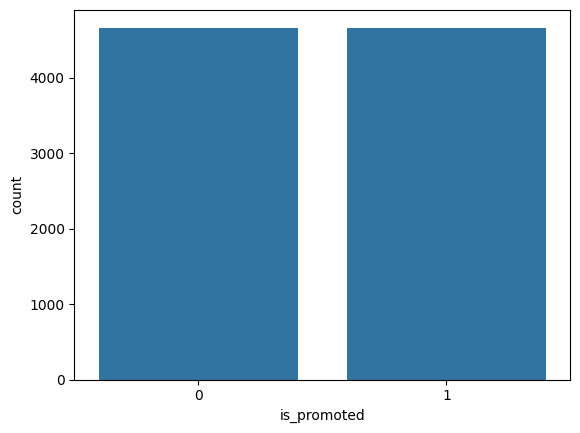

In [ ]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Data Split for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5638 - loss: 0.8057 - val_accuracy: 0.6087 - val_loss: 0.6556
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6052 - loss: 0.6639 - val_accuracy: 0.6123 - val_loss: 0.6584
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6211 - loss: 0.6480 - val_accuracy: 0.6412 - val_loss: 0.6287
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6358 - loss: 0.6348 - val_accuracy: 0.6476 - val_loss: 0.6194
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6405 - loss: 0.6321 - val_accuracy: 0.6558 - val_loss: 0.6178
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6435 - loss: 0.6285 - val_accuracy: 0.6551 - val_loss: 0.6140
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6303 - loss: 0.6314 - val_accuracy: 0.6491 - val_loss: 0.6114
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6405 - loss: 0.6295 - val_accuracy: 0.

#### Evaluation of model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and get classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.5866
Test Loss: 0.603068470954895
Test Accuracy: 0.6472688317298889
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1373
           1       0.68      0.59      0.63      1428

    accuracy                           0.65      2801
   macro avg       0.65      0.65      0.65      2801
weighted avg       0.65      0.65      0.65      2801

